<img src='https://github.com/Ikomia-dev/notebooks/blob/main/examples/img/banner_ikomia.png?raw=true'>




#  Create your image FLUX.1

**The FLUX.1 text-to-image diffusion model developed by [Black Forest Labs](https://blackforestlabs.ai/)** marks a significant leap forward in the field of generative AI. Leveraging a sophisticated hybrid architecture, FLUX.1 combines multimodal diffusion and transformer blocks, resulting in a model that excels in producing highly detailed and coherent images from text prompts. 

**With 12 billion parameters, FLUX.1 surpasses many existing models in terms of visual quality, prompt adherence, and overall performance.‍** FLUX.1 shares a close relationship with Stability AI, the creators of Stable Diffusion, given that many of the key developers behind FLUX.1 were originally part of the team that developed Stable Diffusion. This connection is evident in the technical innovations and design philosophies that underpin both models.

![illustration FLUX](https://github.com/black-forest-labs/flux/blob/main/assets/grid.jpg?raw=true)

## Setup

Please use a GPU for this tutorial.

**Note: In this notebook we use the FP8 quantized FLUX.1 models, they require 16Gb VRAM to run**.

In the menu, select "Runtime" then "Change runtime type", choose GPU in "Hardware accelerator".

Check your GPU with the following command:

In [ ]:
!nvidia-smi

You need to install Ikomia Python API with pip


In [ ]:
!pip install ikomia

---

**-Google Colab ONLY- Restart runtime**

Click on the "RESTART RUNTIME" button at the end the previous window.

---

## Run FLUX.1 Schnell

In [ ]:
from ikomia.dataprocess.workflow import Workflow

# Init your workflow
wf = Workflow()

# Add algorithm
algo = wf.add_task(name = "infer_flux_1", auto_connect=False)

# Set parameters
algo.set_parameters({
    'model_name': 'flux1-schnell', # other model: 'flux1-dev'
    'prompt': 'A cat holding a sign that says hello world',
    'num_inference_steps': '4', # Set between 20 and 50 for FLUX Dev
    'guidance_scale': '0', # Set >=3.5 for FLUX dev
    'seed': '-1',
    'width': '1024',
    'height': '1024',
    'num_images_per_prompt':'1',
    # 'token': '[YOUR HF USER TOKEN]', # Only for the Dev model version
    'enable_model_cpu_offload': 'True'
    })

# Generate your image
wf.run()

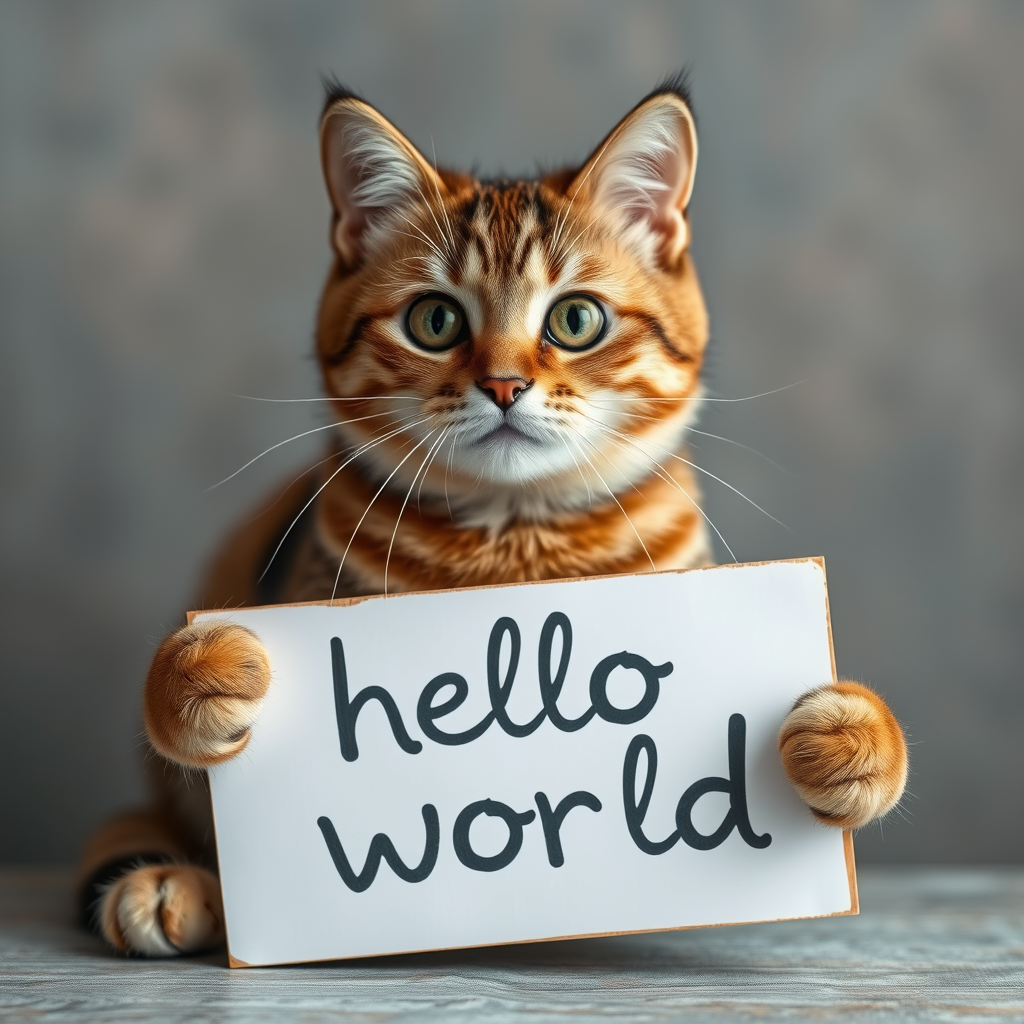

In [3]:
from ikomia.utils.displayIO import display

from PIL import ImageShow
ImageShow.register(ImageShow.IPythonViewer(), 0)

# Display the image
display(algo.get_output(0).get_image())

### :pencil: FLUX.1 parameters
- **model_name** (str) - default 'flux1-dev': Name of the stable diffusion model. Other model available:
    - flux1-schnell
- **prompt** (str) - default 'A cat holding a sign that says hello world, outdoor, garden' : Text prompt to guide the image generation.
- **num_inference_steps** (int) - default '4': Number of inference steps
- **guidance_scale** (float) - default '0.0':  Higher guidance scale encourages to generate images that are closely linked to the text prompt, usually at the expense of lower image quality. (minimum: 1; maximum: 20).
- **height** (int) - default '1024': The height in pixels of the generated image.
- **width** (int) - default '1024': The width in pixels of the generated image.
- **num_images_per_prompt** (int) - default '1': Number of generated image(s).
- **seed** (int) - default '-1': Seed value. '-1' generates a random number between 0 and 191965535.
- **token** (str) - default '' : Your Hugging Face user token ('Read' rights). 
- **enable_model_cpu_offload** (bool) - default 'False' : Offloads all models to CPU using accelerate, reducing memory usage with a low impact on performance. This method moves one whole model at a time to the GPU when its forward method is called, and the model remains in GPU until the next model runs. 
- **vae_enable_slicing** (bool) - default 'False' : Enable sliced VAE decoding. When this option is enabled, the VAE will split the input tensor in slices to compute decoding in several steps. This is useful to save some memory and allow larger batch sizes.
- **vae_enable_tiling** (bool) - default 'False' : Enable tiled VAE decoding. When this option is enabled, the VAE will split the input tensor into tiles to compute decoding and encoding in several steps. This is useful to save a large amount of memory and to allow the processing of larger images.

### Get your Hugging Face Token to use FLUX.1 Dev 

To run FLUX.1 Dev you need to:
1. Generate your Hugging Face [access token](https://huggingface.co/docs/hub/security-tokens) (Type: Read)
2. Share your contact info to Hugging Face in order to access the [Flux dev model](https://huggingface.co/black-forest-labs/FLUX.1-dev/tree/main)